<h2>Sage Notebook for exercise<br />2.1   Ball in tube</h2>
<p>of the lecture</p>
<p>    Patter Formation and Nonlinear Dynamics
<br />    Uni Leipzig, Summer Term 2019
<br />    Author:  Jürgen Vollmer (2018)
<br />    License:  Creative Commons Attribution-ShareAlike 4.0 International (CC BY-SA 4.0)
<br />    see:  https://creativecommons.org/licenses/by-sa/4.0/deed.en</p>
<p><strong>Sage</strong> is an OpenSource Projekt, that provides many methods of computer-based Mathematics
<br /> and Computer Algebra in a Python-based Notebook. 
<br /><strong>Documentation</strong> and Information about <strong>Installation</strong> is provided at
<br />        https://sagemath.org
<br /> As introduction to Sage I recommend the book
<br />        Paul Zimmermann, u.a.: "Computational Mathematics with SageMath"
<br />        http://sagebook.gforge.inria.fr/english.html</p>

<h2> Definitions of Variables and Constants</h2>
<p>Path and common name for graphics</p>
<p>Please edit the path and remove the comments preceding "save_image()"-commands, when you intend to save images.</p>

In [1]:
baseName = '/home/jv/Teach/2019S_PatternFormation/Uebung/Sage/prob02_1__ball_in_tube/'

<p>load packages for plotting and numerics</p>

In [2]:
import scipy; from scipy import integrate
import numpy as np

<p>Parameter:  </p>
<ul>
<li>mass ratio  $\mu$</li>
</ul>

In [3]:
mu = var('mu')

<p>Definition of $Q$ as Function of t</p>
with  $Q = (x, \dot x, \theta, \dot\theta)$

In [4]:
t = var('t')
def dQ_dt(Q, t=0) :
    return [ Q[1], Q[0]*Q[3]*Q[3]-sin(Q[2]), Q[3],-(2*Q[0]*Q[1]*Q[3]+(Q[0]+mu/2)*cos(Q[2]))/(Q[0]*Q[0]+mu/3) ]

<h2>Plot Trajectories</h2>

<p>...for given mass ratios</p>

In [5]:
Ratios = [0.05, 0.06, 0.07, 0.08, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]

<p>calculate trajectories</p>

In [6]:
# t = srange(0, 30, 0.05 )
t = 1/20+np.fromiter(xrange(10*20), dtype=np.float64)/20

# Vector with initial conditions
V = VectorSpace(RR, 4)
IC = V([0, 0, 0, 0])

Trajektories = []
for mu in Ratios:
    Trajektories.append( integrate.odeint( dQ_dt, IC, t ) )

### $\theta$ plotten

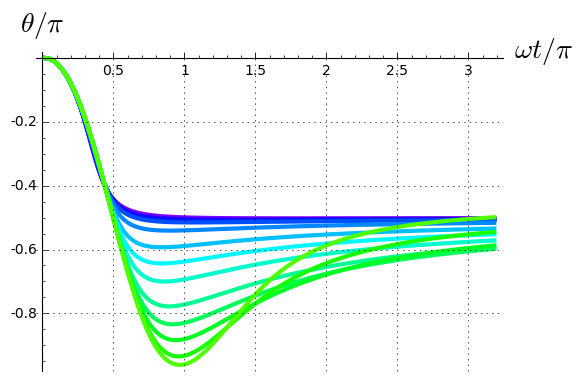

In [7]:
p = plot([])
p.axes_labels( [r'$\omega t$', r'$\theta$'] )

n=0
for X in Trajektories :
    x, dx, theta, dtheta = X.T
    n  += 1
    p  += line( zip( t/pi, theta/pi ), color=hue(.8-float(n)/(1.8*15)), thickness=3 )

p.axes_labels( [r'$\omega t/\pi$', r'$\theta/\pi$'] )
p.axes_labels_size( 2 )
p.show( gridlines=True, figsize=[6,4] )

p.save_image(baseName+'Trajectories_theta_t.svg', figsize=[6,4])

### x/L plotten

/usr/lib/python2.7/dist-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


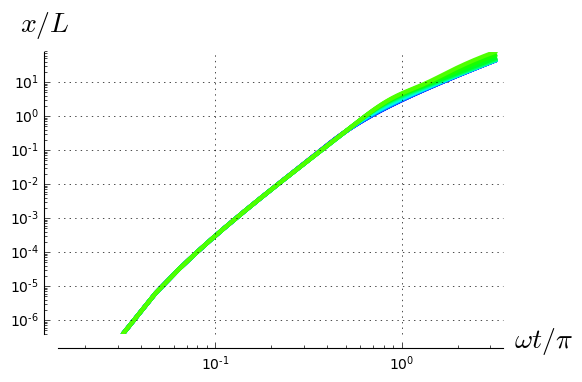

In [8]:
p = plot_loglog([])
p.axes_labels( [r'$\omega t$', r'$\theta$'] )

n=0
for X in Trajektories :
    x, dx, theta, dtheta = X.T
    n  += 1
    p  += line( zip( t/pi, x ), color=hue(.8-float(n)/(1.8*15)), thickness=3 )

p.axes_labels( [r'$\omega t/\pi$', r'$x/L$'] )
p.axes_labels_size( 2 )
p.show( gridlines=True, figsize=[6,4] )

p.save_image(baseName+'Trajectories_x_t.svg', figsize=[6,4])

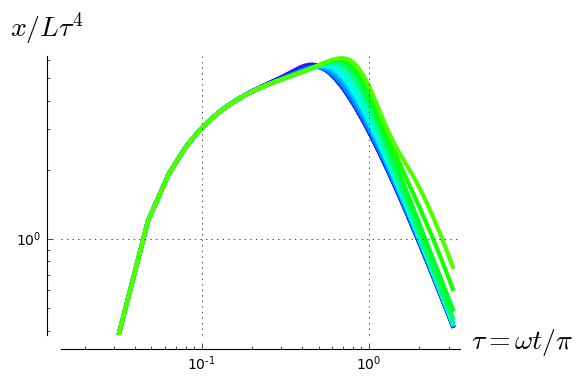

In [9]:
p = plot_loglog([])
p.axes_labels( [r'$\omega t$', r'$\theta$'] )

n=0
for X in Trajektories :
    x, dx, theta, dtheta = X.T
    n  += 1
    p  += line( zip( t/pi, x / (t/pi)^4 ), color=hue(.8-float(n)/(1.8*15)), thickness=3 )

p.axes_labels( [r'$\tau = \omega t/\pi$', r'$x/L \tau^4$'] )
p.axes_labels_size( 2 )
p.show( gridlines=True, figsize=[6,4] )

# p.save_image(baseName+'Trajectories_x_t.svg', figsize=[6,4])

### x/L  vs  theta

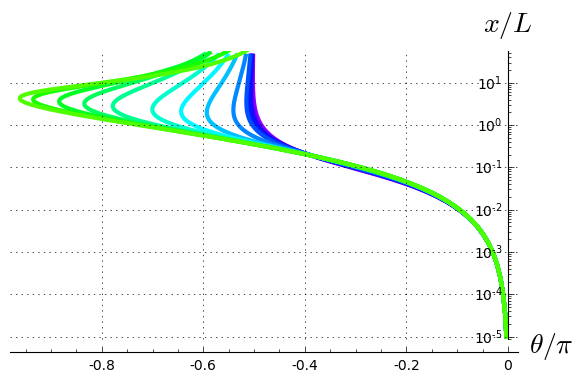

In [10]:
p = plot_semilogy([])
p.axes_labels( [r'$\omega t$', r'$\theta$'] )

n=0
for X in Trajektories :
    x, dx, theta, dtheta = X.T
    n  += 1
    p  += line( zip( theta/pi, x ), color=hue(.8-float(n)/(1.8*15)), thickness=3 )

p.axes_labels( [r'$\theta/\pi$', r'$x/L$'] )
p.axes_labels_size( 2 )
p.show( gridlines=True, figsize=[6,4], ymin=1e-5, ymax=50 )

p.save_image(baseName+'Trajectories_x_theta.svg', figsize=[6,4])

### $x/L$ at $\theta = \pi/2$

/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:9: RuntimeWarning: overflow encountered in greater
/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater


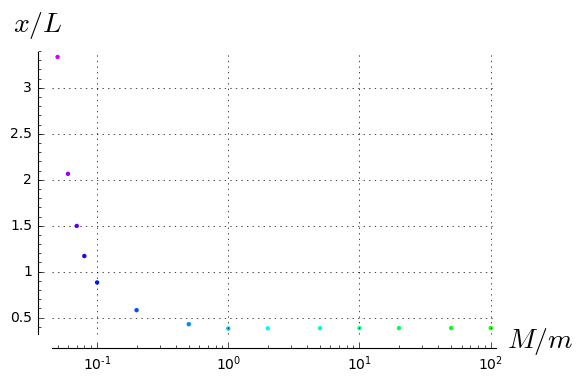

In [12]:
p = plot_semilogx([])
p.axes_labels( [r'$\omega t$', r'$\theta$'] )

n=0
for X in Trajektories :
    x, dx, theta, dtheta = X.T
    j=0
    # pts = ( (pVal, qVal) in X.T[::2] )
    while ( theta[j] > -0.5*pi  and  j < 199 ) : 
        j+= 1
    if j < 198 :
        p  += point((Ratios[n], x[j]), color=hue(.8-float(n)/(1.8*15)))
    n  += 1

p.axes_labels( [r'$M/m$', r'$x/L$'] )
p.axes_labels_size( 2 )
p.show( gridlines=True, figsize=[6,4] )

p.save_image(baseName+'Trajectories_x_mu.svg', figsize=[6,4])

### $\theta/\pi$ where  $x = L$

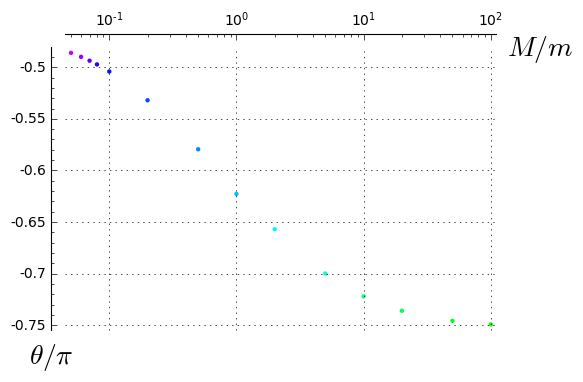

In [13]:
p = plot_semilogx([])
p.axes_labels( [r'$\omega t$', r'$\theta$'] )

n=0
for X in Trajektories :
    x, dx, theta, dtheta = X.T
    j=0
    while ( x[j] < 1  and  j < 199 ) : 
        j+= 1
    if j < 198 :
        p  += point((Ratios[n], theta[j]/pi), color=hue(.8-float(n)/(1.8*15)))
    n  += 1

p.axes_labels( [r'$M/m$', r'$\theta/\pi$'] )
p.axes_labels_size( 2 )
p.show( gridlines=True, figsize=[6,4] )

p.save_image(baseName+'Trajectories_theta_mu.svg', figsize=[6,4])